#Initialization

Import:
1. NumPy implements support for multi-dimensional arrays and matrices.
2. PyTorch is an open source ML library.
3. TorchVision includes popular datasets, model architectures, and common image transformations for CV (computer vision).
4. Matplotlib includes plotting tools.


~~Install gdown~~ (already installed). It lets us download from Google Drive.

Make a folder for the images to go in.

Define a helper function to plot multiple labeled images in a 2x5 grid.

In [1]:
import numpy as np
import torch 
import torchvision as tv
import torchvision.transforms.functional as f_tfm
import matplotlib.pyplot as plt


#!pip install --upgrade --no-cache-dir gdown

!mkdir written-numbers

""" Helper function to plot a gallery of labeled numbers """
def plot_gallery(images, titles, h, w, n_row=2, n_col=5):
    plt.figure(figsize=(2 * n_col, 2 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(()) #remove tick marks
        plt.yticks(())

#Download and Transform Images

Training images from MNIST dataset. Tranformations:
1. Normalize (mean = 0.5, std = 0.5)

In [2]:
# Normalize only works on a tensor image, so we need a ToTensor transform first
transform = tv.transforms.Compose([
    tv.transforms.ToTensor(), 
    tv.transforms.Normalize((0.5,), (0.5,))
])

training_set = tv.datasets.MNIST('-/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(training_set, batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting -/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to -/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting -/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to -/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting -/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to -/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting -/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to -/.pytorch/MNIST_data/MNIST/raw



Custom images from school Google Drive. Transformations:
1. Crop to 750x750 about the center (zooms in)
2. Add contrast (to remove noise)
3. Convert to grayscale
4. Resize image to 28x28
5. Invert (to have white number on black background)

In [3]:
# Download handwritten images from Google Drive
!gdown 1AwngrKgcREsxENdDBmCRoISHqlKyas9B -O ./written-numbers/one.jpg
!gdown 1X5m88xYV9EkVaqiUlK0BlIqpM-6zcFH2 -O ./written-numbers/four.jpg
!gdown 1iCmv0hw3Uz8E3AfBQQSrp2i0BCrOyiAh -O ./written-numbers/seven.jpg
!gdown 18AIxtmk_ZghAbe7FlW-aWPsPAaj_giuH -O ./written-numbers/eight.jpg
!gdown 1Llt49PwCKuaCBr_XQt00TsdiKr5A5fbB -O ./written-numbers/nine.jpg

# Transform to 28x28 with white numbers
numbers = ["one", "four", "seven", "eight", "nine"]
nums = []

for name in numbers:
    path = "written-numbers/" + name + ".jpg"
    num = tv.io.read_image(path).type(torch.float)
    num = f_tfm.center_crop(num, 750)
    num = f_tfm.adjust_contrast(num, 2)
    num = f_tfm.rgb_to_grayscale(num)
    num = f_tfm.resize(num, (28, 28))
    num = f_tfm.invert(num)
    nums.append(num[0])

Downloading...
From: https://drive.google.com/uc?id=1AwngrKgcREsxENdDBmCRoISHqlKyas9B
To: /content/written-numbers/one.jpg
100% 153k/153k [00:00<00:00, 36.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1X5m88xYV9EkVaqiUlK0BlIqpM-6zcFH2
To: /content/written-numbers/four.jpg
100% 139k/139k [00:00<00:00, 42.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1iCmv0hw3Uz8E3AfBQQSrp2i0BCrOyiAh
To: /content/written-numbers/seven.jpg
100% 144k/144k [00:00<00:00, 80.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=18AIxtmk_ZghAbe7FlW-aWPsPAaj_giuH
To: /content/written-numbers/eight.jpg
100% 159k/159k [00:00<00:00, 74.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Llt49PwCKuaCBr_XQt00TsdiKr5A5fbB
To: /content/written-numbers/nine.jpg
100% 144k/144k [00:00<00:00, 50.1MB/s]


# Display Initial Images

Numbers from the MNIST dataset.

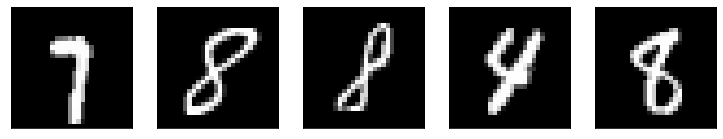

In [4]:
#create an iterator for the dataset
dataiter = iter(trainloader)
images, labels = next(dataiter)

names = ["", "", "", "", ""]
plot_gallery(images, names, 28, 28, 1)

Custom handwritten numbers.

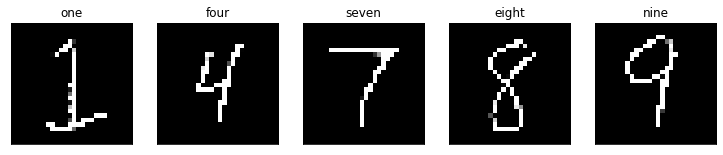

In [5]:
plot_gallery(nums, numbers, 28, 28, 1)

#Create the neural network

In [6]:
#784 inputs, 128  hiddenl (ReLU), 64 hidden2 (ReLU), 10 output (Softmax)
# ReLU - rectified linear unit (or rectifier)
# - Outputs the input if > 0, otherwise outputs 0
# - Most popular activation function, enables better training of deeper networks
# Softmax is used to normalize the output to a probability distribution
input_size = 784 
hidden_sizes = [128, 64] 
output_size = 10 

# Defines the neural network: feed-forward using a sequential container 
# Modules will be added to it in the order they are passed in the constructor
model = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_sizes[0]),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_sizes[0], hidden_sizes[1]),
    torch.nn.Linear(hidden_sizes[1], output_size),
    torch.nn.Softmax(dim=1)
) 

In [7]:
# Define loss function - Negative Log Likelihood Loss
criterion = torch.nn.NLLLoss()

# Iterate over the data 
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Reshape data, 2D image -> 1D vector
# -1 tells it to infer from the other dimensions
#images = images.view(images.shape[0], -1) 
 
# Feed forward 
#logps = model(images) 
#loss = criterion(logps, labels)

#Train the neural network

An epoch is an entire training set. Going through all of the images multiple times gives the network more time to train and improve.

A batch is a subset of the training set.

In [ ]:
# SGD stands for stochastic gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=1.5)

epochs = 20
for e in range(epochs):
    running_loss = 0
    
    for images, labels in trainloader: 
        images = images.view(images.shape[0], -1) 

        # Feed forward
        optimizer.zero_grad() #zero gradients
        output = model(images)
        loss = criterion(output, labels)

        # Backpropagation 
        loss.backward() 
        optimizer.step() #this updates the weights
        running_loss += loss.item() 

    else: 
        print(f"{e: 2}: {(running_loss/len(trainloader)):.8f}", end='\t\t')
        if ((e+1) % 5 == 0): print()

In [ ]:
# Lists for visualization
final_images = []
final_preds = []

# Measure model accuracy 
correct = 0
all_counted = 0

for images, labels in trainloader: 
    for i in range(len(labels)):
        # Reshape image and feed it through the model
        img = images[i].view(1, 784) 
        with torch.no_grad(): 
            logps = model(img) 
        
        ps = torch.exp(logps) 

        # Find the prediction it made
        probabilities = list(ps.numpy()[0])
        pred_label = probabilities.index(max(probabilities)) 
        true_label = labels.numpy()[i]
 
        # Update for percent accuracy
        all_counted += 1
        if(true_label == pred_label): 
            correct += 1
        
        # Add to arrays for visualization
        if (i == 0):
            final_images.append(images[i])
            final_preds.append(f"pred: {pred_label}")

print(f"Model Accuracy: {correct/all_counted * 100:.3f}%")

Visualization of the model's accuracy at the end of training:

In [ ]:
plot_gallery(final_images, final_preds, 28, 28)

#Test the model

First test the model on the handwritten characters. 

This model doesn't do very well with my numbers. I think it is a combination of my lines being thin and the model not being very accurate.

In [ ]:
labels = []
for num in nums:
    testps = model(num.view(1, 784))
    prob = list(ps.detach().numpy()[0])
    pred = prob.index(max(prob))
    labels.append("pred: " + str(pred))

plot_gallery(nums, labels, 28, 28, 1, 5)

Second, test the model on transformed character to see how much variation the model can handle.

In [ ]:
# Lists for visualization
final_images = []
final_preds = []

# Rotate 10 images
for i in range(10, 15):
    image = f_tfm.rotate(images[i], angle=45)
    final_images.append(image)

    testps = model(image.view(1, 784))
    prob = list(testps.detach().numpy()[0])
    pred = prob.index(max(prob))
    final_preds.append("pred: " + str(pred))

# Translate 10 images
for i in range(5, 10):
    image = f_tfm.affine(images[i], angle=0, translate=(-5, 0), scale=1, shear=0)
    final_images.append(image)

    testps = model(image.view(1, 784))
    prob = list(testps.detach().numpy()[0])
    pred = prob.index(max(prob))
    final_preds.append("pred: " + str(pred))

plot_gallery(final_images, final_preds, 28, 28)

The model handles rotations much better than translations.

I would say this is desirable. People can write numbers at various angles, but when we divide up numbers for classification, it isn't very hard to center the image, so they should all be in about the same spot.